# EDA with Python and Logistic Regression - Titanic DataSet

Cite: Reference done from Krish Naik YT video and Ken Jee YT video

In [348]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

### Importing all algorithms we will use

In [349]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


In [350]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

Train columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Test columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [351]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [352]:
train.shape

(891, 12)

### Now we will start Exploring the given dataset

In [353]:
#finding out missing data before we begin
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending= False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [354]:
total = test.isnull().sum().sort_values(ascending=False)
percent_1 = test.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending= False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(15)

,Total,%
Cabin,327.0,36.7
Age,86.0,9.7
Fare,1.0,0.1
PassengerId,0.0,0.0
Pclass,0.0,0.0
Name,0.0,0.0
Sex,0.0,0.0
SibSp,0.0,0.0
Parch,0.0,0.0
Ticket,0.0,0.0


<AxesSubplot:>

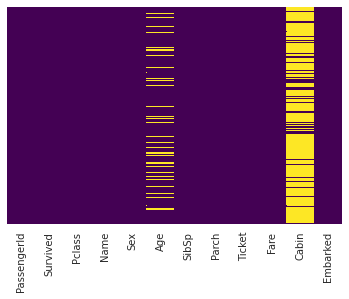

In [355]:
sns.heatmap(train.isnull(),yticklabels= False, cbar = False,cmap = 'viridis')

Embarked has 2 null values and can be easily found out 

Whereas Cabin has 77% null values therefore we might have to drop the column                                       We can notice that we have yellow colors which indicate null values and most of it in columns - Age and Cabin.      We will look at ways to handle these missing data


Light Data Exploration
1) For numeric data

    Made histograms to understand distributions
    Corrplot
    Pivot table comparing survival rate across numeric variables

2) For Categorical Data

    Made bar charts to understand balance of classes
    Made pivot tables to understand relationship with survival



<AxesSubplot:xlabel='Survived', ylabel='count'>

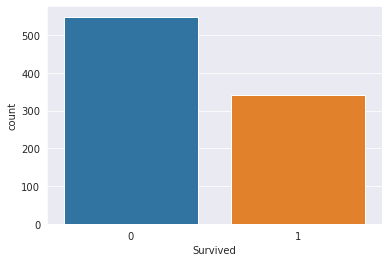

In [356]:
sns.set_style("darkgrid")
sns.countplot(x="Survived",data= train) #count plot for survival, 1: survived and 0: not survived

#Count of how many males and females survived or not 

In [357]:
women = train.loc[train.Sex == 'female']["Survived"]
percent_women = sum(women)/len(women) #sum counts the true values and len is total number of entries

print("% of women who survived:", percent_women*100)

% of women who survived: 74.20382165605095


In [358]:
men = train.loc[train.Sex == 'male']['Survived']
percent_men = sum(men)/len(men)

print("% of men survived: ", percent_men*100)


% of men survived:  18.890814558058924


From this wesee that almost 75% of the women on board survived, whereas only 19% of the men survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

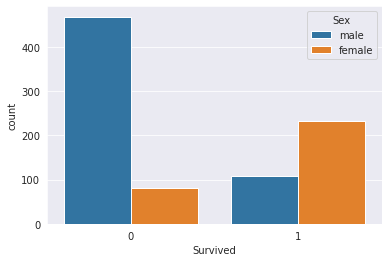

In [359]:
sns.set_style("darkgrid")
sns.countplot(x="Survived",hue = "Sex",data= train)

#Count of how many from each Passenger Class survived or not 

<AxesSubplot:xlabel='Survived', ylabel='count'>

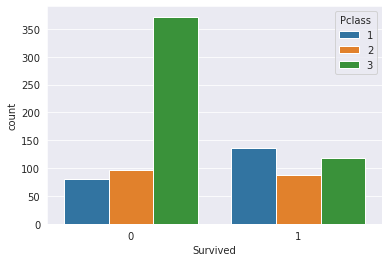

In [360]:
sns.set_style("darkgrid")
sns.countplot(x="Survived",hue = "Pclass",data= train)

We notice that Pclass 3 people make up the majority of people not survived.

1st = Upper

2nd = Middle

3rd = Lower

<AxesSubplot:xlabel='SibSp', ylabel='count'>

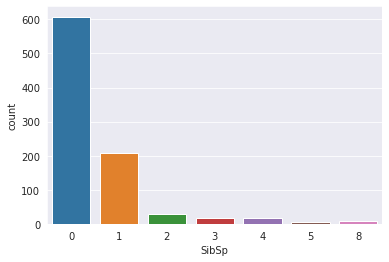

In [361]:
sns.countplot(x="SibSp",data= train)

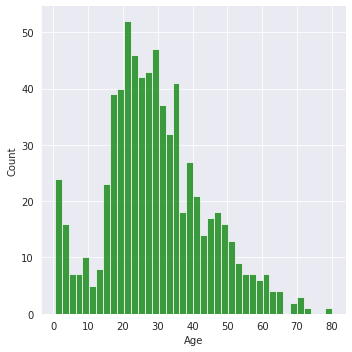

In [362]:
#checking how data is distributed

sns.displot(train['Age'].dropna(),kde = False, color = "green", bins = 40)

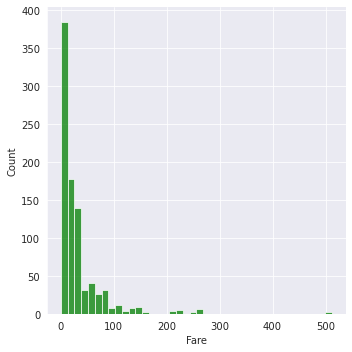

In [363]:
sns.displot(train['Fare'].dropna(),kde = False, color = "green", bins = 40)

# Observations made:

    We notice that Pclass 3 people make up the majority of people not survived
    Number of females survived is more
    Nearly 30% of the passengers had siblings and/or spouse aboard.
    Survival categorical variable with 0 or 1 values

# Handling Missing Values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

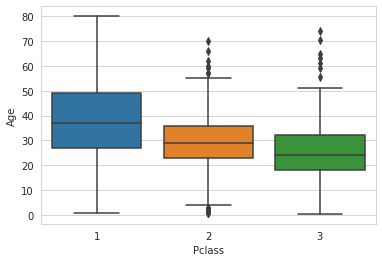

In [364]:
sns.set_style("whitegrid")
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [365]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return(38)
        elif Pclass == 2:
            return(29)
        else:
            return(24)
    else:
        return(Age)

In [366]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1) #axis = 1 along columns

In [367]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1) #axis = 1 along columns

<AxesSubplot:>

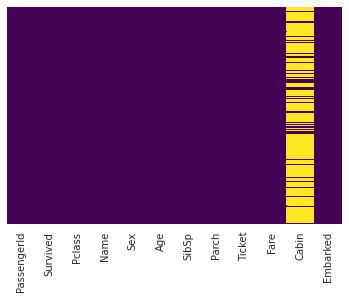

In [368]:
sns.heatmap(train.isnull(),yticklabels= False, cbar = False,cmap = 'viridis')

In [369]:
train.drop("Cabin",axis=1,inplace= True) #since it contains highly incomplete values and isn't critical to survival

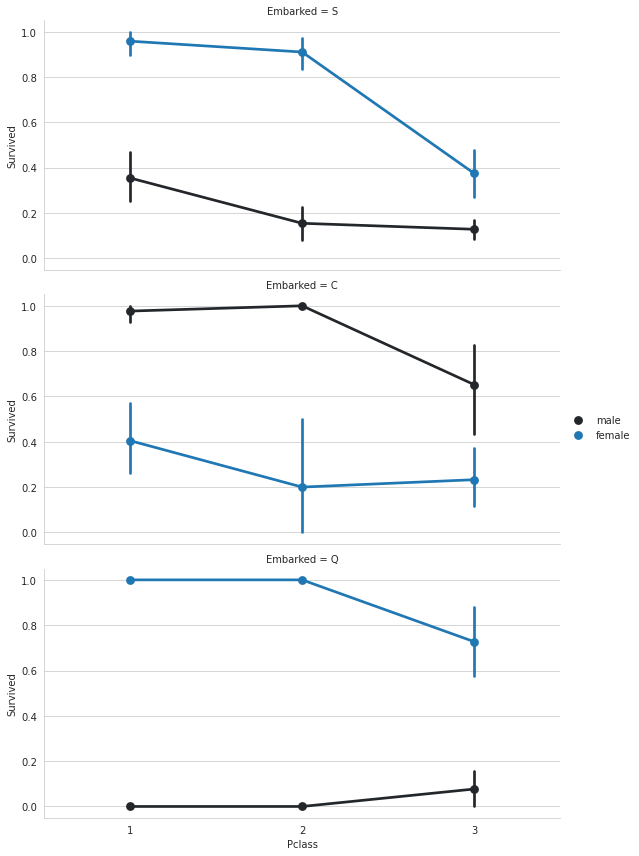

In [370]:
FacetGrid = sns.FacetGrid(train, row='Embarked', height=4, aspect=2)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [371]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [386]:
# most_freq = train['Embarked'].mode()
# # train[train['Embarked']] = train[train['Embarked']].fillna(most_freq)
# # # test['Embarked'] = test['Embarked'].fillna(most_freq)
# # most_freq
# embarked_mode = train['Embarked'].mode()
# train[['Embarked']] = train[['Embarked']].fillna('S',inplace = True)

In [372]:
train.Embarked.fillna(train.Embarked.mode()[0], inplace = True)

In [373]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [378]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending= False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0


Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.


In [379]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [380]:
pd.get_dummies(train['Embarked'],drop_first=True).head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [381]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [382]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace= True)

In [383]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [384]:
pd.concat([train,sex,embark],axis=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [387]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [388]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [389]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [390]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [391]:
from sklearn.model_selection import train_test_split

In [458]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.3, 
                                                    random_state=101)

In [459]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [460]:
predictions = logmodel.predict(X_test)

In [461]:
from sklearn.metrics import confusion_matrix

In [462]:
accuracy=confusion_matrix(y_test,predictions)

In [463]:
accuracy

array([[133,  21],
       [ 60,  54]])

In [464]:
from sklearn.metrics import accuracy_score

In [465]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.6977611940298507

In [466]:
predictions

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0])

### EVALUATING OUR MODEL

#### checking precision,recall,f1-score using classification report!

In [467]:
from sklearn.metrics import classification_report

In [468]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77       154
           1       0.72      0.47      0.57       114

    accuracy                           0.70       268
   macro avg       0.70      0.67      0.67       268
weighted avg       0.70      0.70      0.68       268



In [469]:
from sklearn import svm

In [470]:
clf = svm.SVC(kernel='linear')

In [471]:
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [472]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6865671641791045


In [473]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Precision: 0.734375
Recall: 0.41228070175438597


In [474]:
x_test  = test.drop("PassengerId", axis=1).copy()

In [475]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Y_prediction = rf.predict(X_test)

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
# random_forest.score(X_train, y_train)
# acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [476]:
accuracy

0.7052238805970149

In [477]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
predicted = knn.predict(X_test)  

accuracy = accuracy_score(y_test, predicted)


In [478]:
accuracy

0.5783582089552238